Deprecated code from `20201109_model1-3_anims.ipynb`

In [259]:
def act_area_vor(X, E, thresh):
    """
    Calculate area of activated cells using Voronoi mesh
    """
    vor = Voronoi(X)
    areas = lsig.voronoi_areas(vor)
    
    return areas[E > thresh].sum()

In [263]:
itr = zip(X, S3a)
itr = tqdm.tqdm(itr)

areas3a = []
for x, s in itr:
    areas3a.append(act_area_vor(x, s, 0.2))

areas3a[::100]

1001it [00:10, 93.68it/s]


[0.8660254037844384,
 5.7735026918962555,
 14.958620610822123,
 23.34503262375444,
 39.69283100678678,
 50.5758835810112,
 56.62473793975176,
 69.9235326018547,
 41.445501466826656,
 4.180812294131773,
 4.041451884327381]

:Curve   [x]   (y)
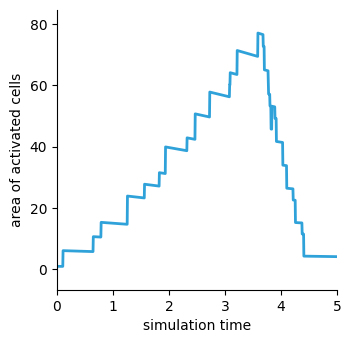

In [264]:
%%capture --no-stdout --no-display

curve3a = hv.Curve(
    (t, areas3a)
).opts(
    xlabel="simulation time",
    ylabel="area of activated cells",
)

hv.output(curve3a, dpi=100)

In [1293]:
# Get initial lattice and its adjacency
r = 1.
L = 20
X0, Adj = lsig.hex_Adj(L, r=r, csr=False)

# Get # cells
n = X0.shape[0]

# Make the center cell the sender cell
sender_idx = lsig.get_center_cells(X0)[0]

# Initialize expression vector
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

In [1294]:
alpha = 3
k = 0.12
p = 2
delta = 3

delay = 0.4

In [1295]:
# confmax = 1.5
# conf_t = np.concatenate([np.ones(nt // 3), np.linspace(1, confmax, (nt // 3)), confmax * np.ones(nt - 2 * (nt // 3))])
# conf_t = np.linspace(1, confmax, (nt))
# r_t = 1 / np.sqrt(conf_t)

# rmin = 1 / np.sqrt(confmax)
# r_t = np.linspace(1, rmin, nt)
# conf_t = 1 / (r_t ** 2)

r = 1.

X = X0
# X = np.array([X0*r for r in r_t])

In [1296]:
# Get RHS for this lattice
rhs = get_rhs(Adj, sender_idx, tc_rhs_3)

# Get edge length as a function of time
# ell_t = r_t/np.sqrt(3)

# Get edge length
ell = r / np.sqrt(3)

# Get beta as a functin of time
beta_t = np.concatenate([np.linspace(1., 0.5, nt // 2), 0.55 * np.ones(nt - (nt // 2))])

# Initialize args
args = (alpha, k, p, ell, delta, beta_t[0])

In [1297]:
S3b = lsig.integrate_DDE_varargs(
    t,
    rhs,
    beta_t,
    args,
    S0,
    delay,
    progress_bar=True,
    min_delay=5,
    where_vars=np.array([5]),
)

100%|██████████| 1000/1000 [00:00<00:00, 9926.95it/s]


In [1298]:
fname3b = f"model3_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_tau{delay:.2f}_delta{delta:.1f}_beta{beta_t[0]:.2f}-{beta_t[-1]:.2f}"
fname3b

'model3_alpha3.0_k1.2e-01_p2.0_tau0.40_delta3.0_beta1.00-0.55'

In [1299]:
rads3b = np.array([lsig.beta_to_rad(beta_t, r)] * n).T

In [1300]:
itr = S3b
itr = tqdm.tqdm(itr)

areas3b = []
for s in itr:
    areas3b.append(lsig.act_area_chull(X, s, 0.1))

areas3b[::100]

100%|██████████| 1001/1001 [00:02<00:00, 354.56it/s]


[0,
 2.598076211353315,
 10.392304845413262,
 23.382685902179844,
 38.97114317029974,
 54.55960043841965,
 62.35382907247959,
 77.94228634059948,
 62.35382907247959,
 54.55960043841965,
 23.382685902179844]

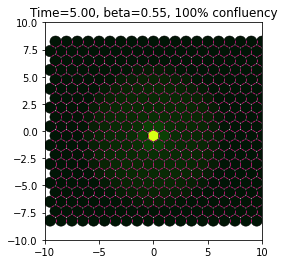

In [1301]:
title_fun3b = lambda i: f"Time={t[i]:.2f}, beta={beta_t[i]:.2f}, 100% confluency"

idx=-1

lsig.inspect_out(
    X=X,
    cell_radii=rads3b,
    var=S3b, 
    idx=idx,
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_fun3b(idx),
    xylim=(-L/2, L/2, -L/2, L/2),
    axis_off=False,
)

Writing to: plots\model3_alpha3.0_k1.2e-01_p2.0_tau0.40_delta3.0_beta1.00-0.55


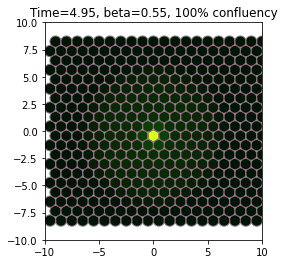

In [1304]:
lsig.animate_var_lattice(
    X_arr=X,
    cell_radii=rads3b,
    var=S3b, 
    n_frames=100,
    file_name=fname3b,
#     dir_name="plots",
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_fun3b,
    xylim=(-L/2, L/2, -L/2, L/2),
    axis_off=False,
)

In [1188]:
# Get initial lattice and its adjacency
r = 1.
L = 20
X0, Adj = lsig.hex_Adj(L, r=r, csr=False)

# Get # cells
n = X0.shape[0]

# Make the center cell the sender cell
sender_idx = lsig.get_center_cells(X0)[0]

# Initialize expression vector
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

In [1189]:
alpha = 3
k = 0.1
p = 2
delta = 3

delay = 0.4

In [1190]:
# confmax = 1.5
# conf_t = np.concatenate([np.ones(nt // 3), np.linspace(1, confmax, (nt // 3)), confmax * np.ones(nt - 2 * (nt // 3))])
# conf_t = np.linspace(1, confmax, (nt))
# r_t = 1 / np.sqrt(conf_t)

# rmin = 1 / np.sqrt(confmax)
# r_t = np.linspace(1, rmin, nt)
# conf_t = 1 / (r_t ** 2)

r = 1.

X = X0
# X = np.array([X0*r for r in r_t])

In [1207]:
# Get RHS for this lattice
rhs = get_rhs(Adj, sender_idx, tc_rhs_3)

# Get edge length as a function of time
# ell_t = r_t/np.sqrt(3)

# Get edge length
ell = r / np.sqrt(3)

# Get beta as a functin of time
beta_t = np.concatenate([np.linspace(1., 0.4, 2 * (nt // 3)), 0.4 * np.ones(nt - 2 * (nt // 3))])

# Initialize args
args = (alpha, k, p, ell, delta, beta_t[0])

In [1208]:
S3c = lsig.integrate_DDE_varargs(
    t,
    rhs,
    beta_t,
    args,
    S0,
    delay,
    progress_bar=True,
    min_delay=5,
    where_vars=np.array([5]),
)

100%|██████████| 1000/1000 [00:00<00:00, 12533.07it/s]


In [1209]:
fname3c = f"model3_alpha{alpha:.1f}_k{k:.1e}_p{p:.1f}_tau{delay:.2f}_delta{delta:.1f}_beta{beta_t[0]:.2f}-{beta_t[-1]:.2f}_mid"
fname3c

'model3_alpha3.0_k1.0e-01_p2.0_tau0.40_delta3.0_beta1.00-0.40_mid'

In [1210]:
rads3c = np.array([lsig.beta_to_rad(beta_t, r)] * n).T

In [1211]:
itr = S3c
itr = tqdm.tqdm(itr)

areas3c = []
for s in itr:
    areas3c.append(lsig.act_area_chull(X, s, 0.1))

areas3c[::100]

100%|██████████| 1001/1001 [00:03<00:00, 330.59it/s]


[0,
 2.598076211353315,
 10.392304845413262,
 23.382685902179844,
 38.97114317029974,
 62.35382907247959,
 83.1384387633061,
 90.93266739736606,
 111.71727708819259,
 103.92304845413263,
 2.598076211353315]

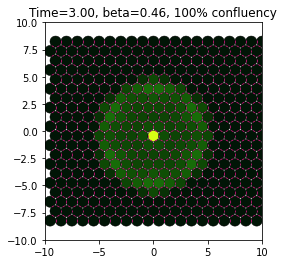

In [1222]:
title_fun3c = lambda i: f"Time={t[i]:.2f}, beta={beta_t[i]:.2f}, 100% confluency"

idx=600

lsig.inspect_out(
    X=X,
    cell_radii=rads3c,
    var=S3c, 
    idx=idx,
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor=None, linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_fun3c(idx),
    xylim=(-L/2, L/2, -L/2, L/2),
    axis_off=False,
)

Writing to: plots\model3_alpha3.0_k1.0e-01_p2.0_tau0.40_delta3.0_beta1.00-0.55


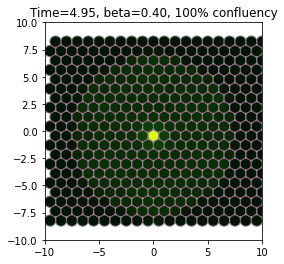

In [1223]:
lsig.animate_var_lattice(
    X_arr=X,
    cell_radii=rads3b,
    var=S3b, 
    n_frames=100,
    file_name=fname3b,
#     dir_name="plots",
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_fun3b,
    xylim=(-L/2, L/2, -L/2, L/2),
    axis_off=False,
)